In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import os
# Set the project root directory as the working directory
project_root = r"d:\OneDrive - The University of Western Ontario\03 课程\ECE 9611\Project\Group2_household electricity consumption analysis\ECE9611_Group2"
os.chdir(project_root)
print("Current working directory:", os.getcwd())

Current working directory: d:\OneDrive - The University of Western Ontario\03 课程\ECE 9611\Project\Group2_household electricity consumption analysis\ECE9611_Group2


# EDA and Feature Engineering

## ===== 1. Data Loading =====

In [31]:
pd.set_option("display.max_columns", 200)

INPUT_PATH = r"01 Dataset\02 Processed Data\05 Smart_meter_with_survey_features_added_label.csv"

df = pd.read_csv(INPUT_PATH)
df.columns = df.columns.str.strip()

print("Data shape:", df.shape)
df.head()

Data shape: (463399, 48)


,household_ID,DATE,TIME,TOTAL_IMPORT (kWh),w1_hh_member_count,w1_hh_avg_age,w1_hh_num_children,w1_hh_num_seniors,w1_hh_avg_hours_home,w1_hh_share_went_out_for_work,w1_num_fans,w1_fan_hours_day,w1_fan_hours_night,w1_num_lights,w1_light_total_wattage,w1_light_hours_day,w1_light_hours_night,w1_num_rooms,w1_total_windows,w1_total_doors_ext,w1_total_room_bulbs,w1_total_room_fans,w1_total_room_acs,w1_num_bedrooms,own_the_house_or_living_on_rent,built_year_of_the_house,type_of_house,floor_area,is_there_business_carried_out_in_the_household,socio_economic_class,total_monthly_expenditure_of_last_month,method_of_receiving_water,water_heating_method_for_bathing,boil_water_before_drinking,no_of_times_food_cooked_last_week,gas_used_for_cooking,electricity_from_national_grid_used_for_cooking,electricity_generated_using_solar_energy_used_for_cooking,firewood_used_for_cooking,kerosene_used_for_cooking,sawdust_or_paddy_husk_used_for_cooking,biogas_used_for_cooking,coconut_shells_or_charcoal_used_for_cooking,timestamp,next_timestamp,next_import,delta_hours_next,future_6h_consumption
0,ID0220,2023-01-01,1:11:16,2203.1041,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,"Yes, I or a household member owns it.",1990-1999,Single House - Double Floor,1500.0,No,SEC C,50000.0,Tap Water (National Water Supply and drainage ...,"None, we do not use hot water for bathing or b...",No,8 - 14 times,Yes,No,No,No,No,No,No,No,2023-01-01 01:11:16,2023-01-01 06:29:34,2203.709,5.305000,0.6049
1,ID0220,2023-01-02,21:22:00,2209.0300,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,"Yes, I or a household member owns it.",1990-1999,Single House - Double Floor,1500.0,No,SEC C,50000.0,Tap Water (National Water Supply and drainage ...,"None, we do not use hot water for bathing or b...",No,8 - 14 times,Yes,No,No,No,No,No,No,No,2023-01-02 21:22:00,2023-01-03 01:42:52,2209.764,4.347778,0.7340
2,ID0220,2023-01-03,1:42:52,2209.7640,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,"Yes, I or a household member owns it.",1990-1999,Single House - Double Floor,1500.0,No,SEC C,50000.0,Tap Water (National Water Supply and drainage ...,"None, we do not use hot water for bathing or b...",No,8 - 14 times,Yes,No,No,No,No,No,No,No,2023-01-03 01:42:52,2023-01-03 06:40:57,2210.320,4.968056,0.5560
3,ID0220,2023-01-03,21:17:42,2212.8880,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,"Yes, I or a household member owns it.",1990-1999,Single House - Double Floor,1500.0,No,SEC C,50000.0,Tap Water (National Water Supply and drainage ...,"None, we do not use hot water for bathing or b...",No,8 - 14 times,Yes,No,No,No,No,No,No,No,2023-01-03 21:17:42,2023-01-04 01:45:27,2213.847,4.462500,0.9590
4,ID0220,2023-01-04,1:45:27,2213.8470,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,"Yes, I or a household member owns it.",1990-1999,Single House - Double Floor,1500.0,No,SEC C,50000.0,Tap Water (National Water Supply and drainage ...,"None, we do not use hot water for bathing or b...",No,8 - 14 times,Yes,No,No,No,No,No,No,No,2023-01-04 01:45:27,2023-01-04 06:40:59,2214.752,4.925556,0.9050


## ===== 2. Features Distribution Analysis =====

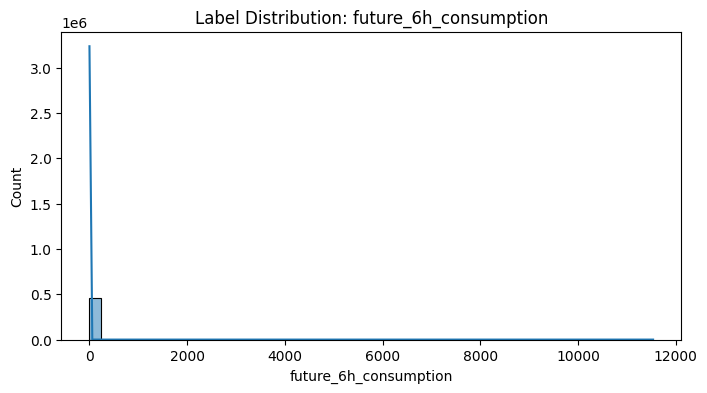

Label Statistics:
count    463399.000000
mean          5.715114
std         177.386959
min           0.000900
25%           0.499000
50%           0.836000
75%           1.336000
max       11535.258900
Name: future_6h_consumption, dtype: float64


In [32]:

plt.figure(figsize=(8,4))
sns.histplot(df["future_6h_consumption"], bins=50, kde=True)
plt.title("Label Distribution: future_6h_consumption")
plt.show()

print("Label Statistics:")
print(df["future_6h_consumption"].describe())


after removing negative future_6h_consumption, shape: (462713, 48)


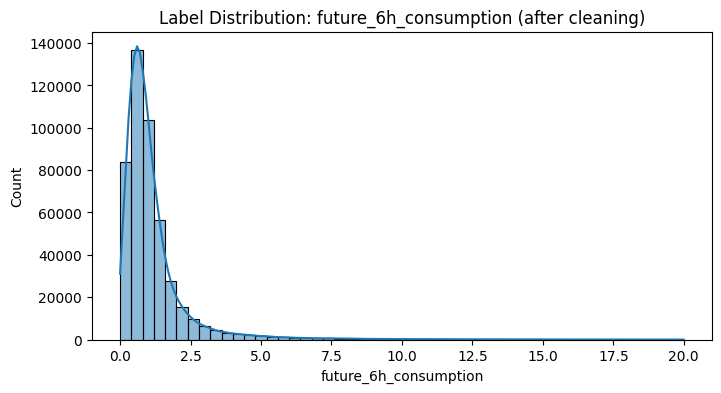

Label Statistics:
count    462713.000000
mean          1.163709
std           1.334644
min           0.000900
25%           0.498000
50%           0.835000
75%           1.333000
max          19.998000
Name: future_6h_consumption, dtype: float64


In [33]:
# Clean Negative Labels and Re-analyze
df_6h_clean = df[(df["future_6h_consumption"] >= 0) & (df["future_6h_consumption"] <= 20)].reset_index(drop=True)
print("after removing negative future_6h_consumption, shape:", df_6h_clean.shape)
plt.figure(figsize=(8,4))
sns.histplot(df_6h_clean["future_6h_consumption"], bins=50, kde=True)
plt.title("Label Distribution: future_6h_consumption (after cleaning)")
plt.show()
print("Label Statistics:")
print(df_6h_clean["future_6h_consumption"].describe())

In [34]:
# further analysis only on cleaned data
num_cols = df_6h_clean.select_dtypes(include=[np.number]).columns.tolist()

# Remove the label itself and meaningless features
num_cols = [c for c in num_cols if c != "future_6h_consumption" and c != "TOTAL_IMPORT (kWh)" and c !="next_import" and c !="delta_hours_next"]

print("Number of numerical features:", len(num_cols), ", including:", num_cols)

# Calculate Pearson correlation (linear relationship)
corr = df_6h_clean[num_cols + ["future_6h_consumption"]].corr()["future_6h_consumption"].sort_values(ascending=False)
corr


Number of numerical features: 22 , including: ['w1_hh_member_count', 'w1_hh_avg_age', 'w1_hh_num_children', 'w1_hh_num_seniors', 'w1_hh_avg_hours_home', 'w1_hh_share_went_out_for_work', 'w1_num_fans', 'w1_fan_hours_day', 'w1_fan_hours_night', 'w1_num_lights', 'w1_light_total_wattage', 'w1_light_hours_day', 'w1_light_hours_night', 'w1_num_rooms', 'w1_total_windows', 'w1_total_doors_ext', 'w1_total_room_bulbs', 'w1_total_room_fans', 'w1_total_room_acs', 'w1_num_bedrooms', 'floor_area', 'total_monthly_expenditure_of_last_month']


future_6h_consumption                      1.000000
w1_total_room_acs                          0.608380
w1_total_room_bulbs                        0.410041
w1_num_lights                              0.409559
w1_num_rooms                               0.395912
w1_total_room_fans                         0.359526
w1_num_bedrooms                            0.356073
w1_num_fans                                0.353074
floor_area                                 0.320613
w1_total_windows                           0.296289
total_monthly_expenditure_of_last_month    0.295596
w1_total_doors_ext                         0.290078
w1_light_hours_night                       0.222405
w1_hh_member_count                         0.160504
w1_light_total_wattage                     0.146943
w1_fan_hours_night                         0.109773
w1_fan_hours_day                           0.105321
w1_light_hours_day                         0.081215
w1_hh_num_children                         0.057408
w1_hh_num_se

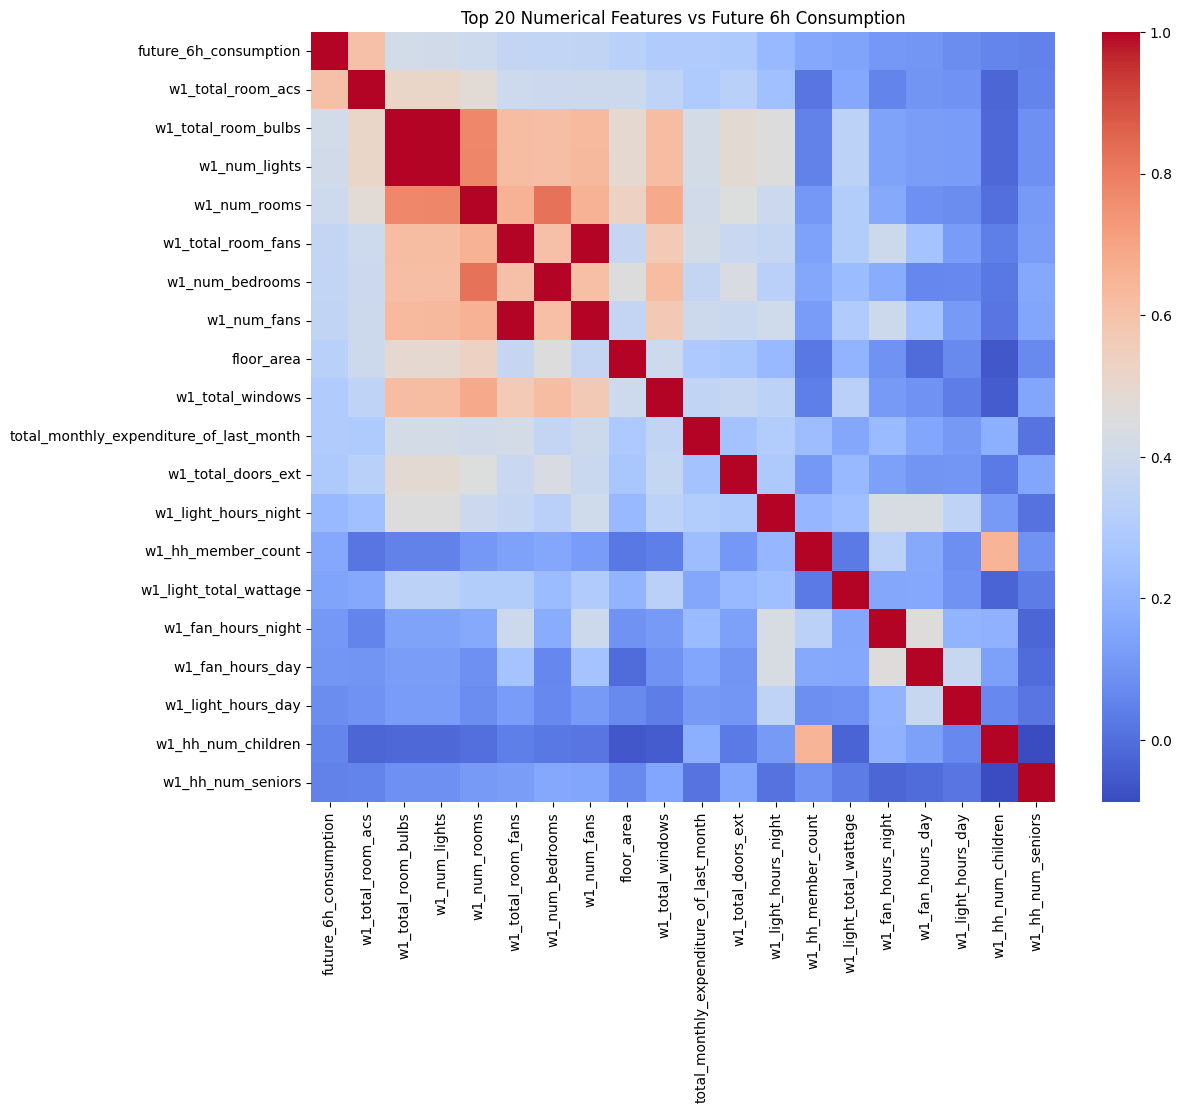

In [35]:
top_corr_cols = corr.index[:20].tolist()  # Select top 20 features
corr_matrix = df_6h_clean[top_corr_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Top 20 Numerical Features vs Future 6h Consumption")
plt.show()


Number of categorical features: 17
['own_the_house_or_living_on_rent', 'built_year_of_the_house', 'type_of_house', 'is_there_business_carried_out_in_the_household', 'socio_economic_class', 'method_of_receiving_water', 'water_heating_method_for_bathing', 'boil_water_before_drinking', 'no_of_times_food_cooked_last_week', 'gas_used_for_cooking', 'electricity_from_national_grid_used_for_cooking', 'electricity_generated_using_solar_energy_used_for_cooking', 'firewood_used_for_cooking', 'kerosene_used_for_cooking', 'sawdust_or_paddy_husk_used_for_cooking', 'biogas_used_for_cooking', 'coconut_shells_or_charcoal_used_for_cooking']


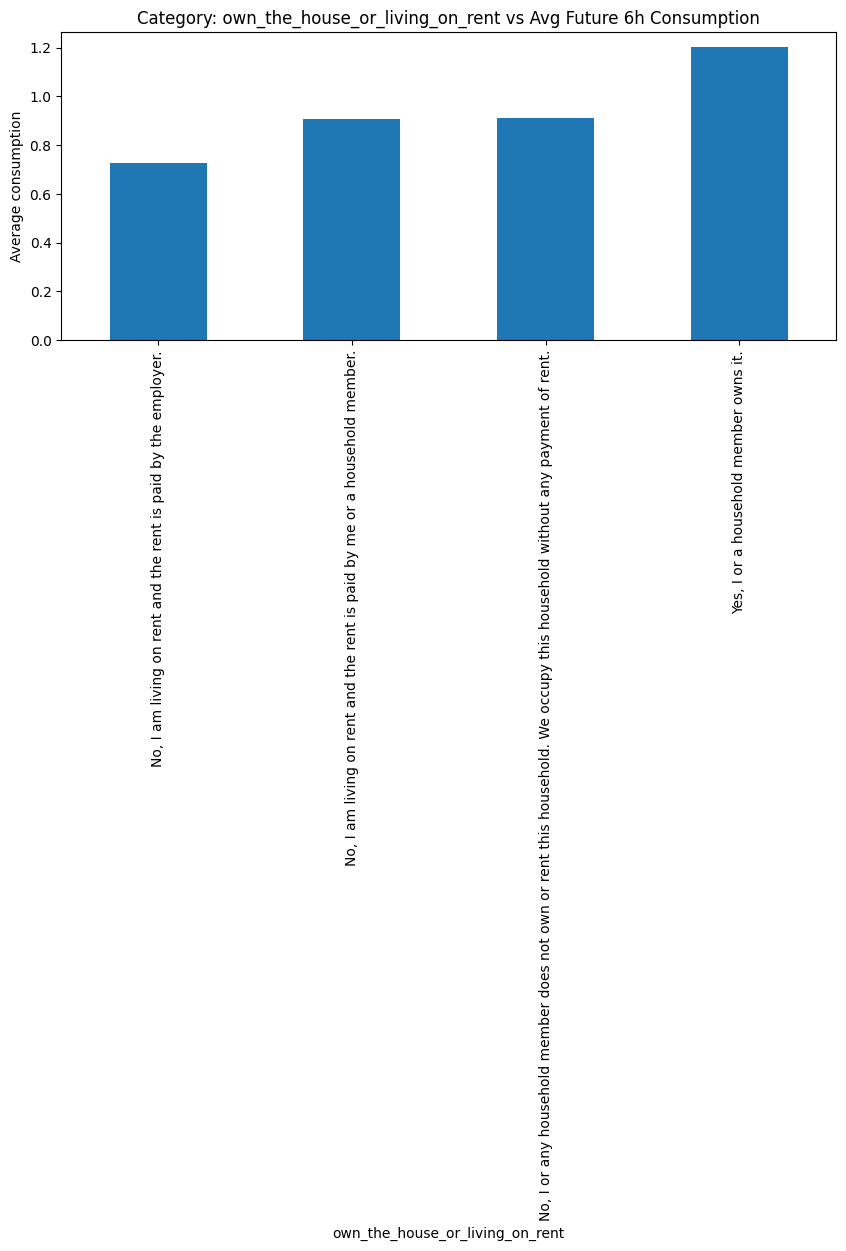

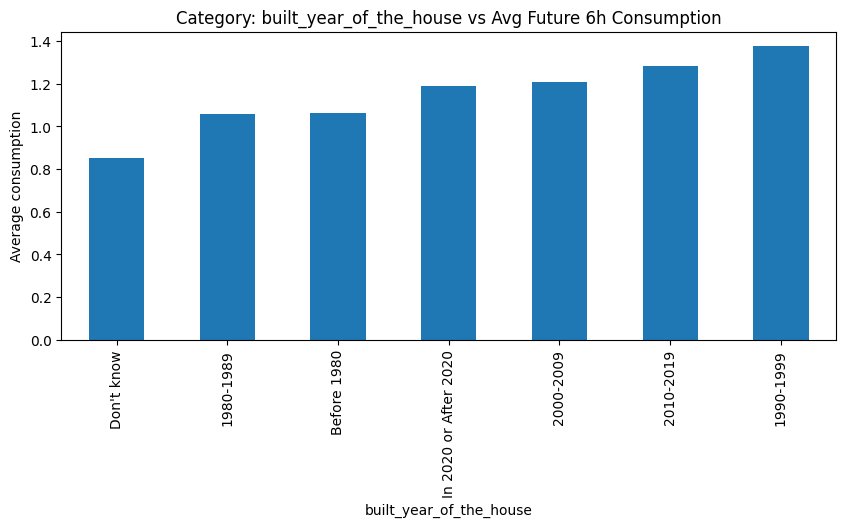

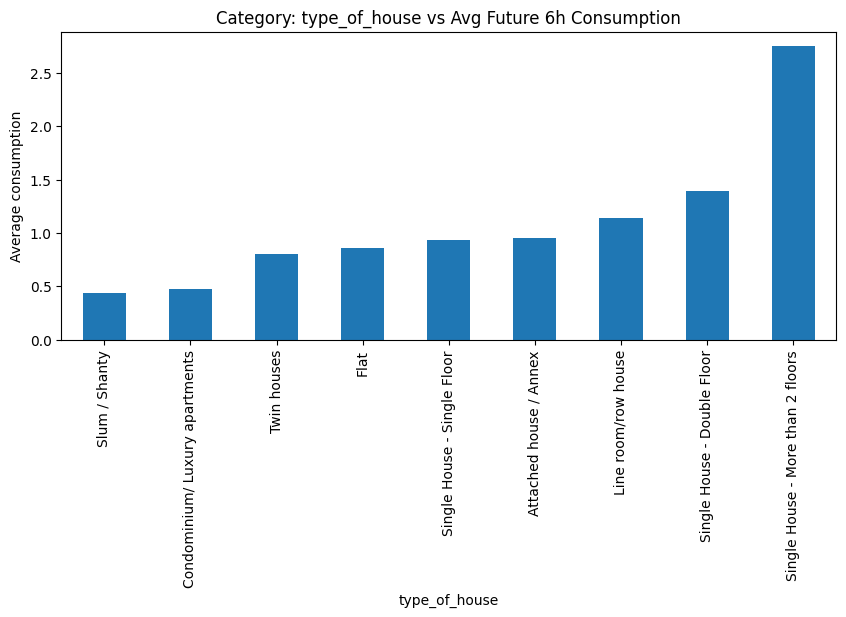

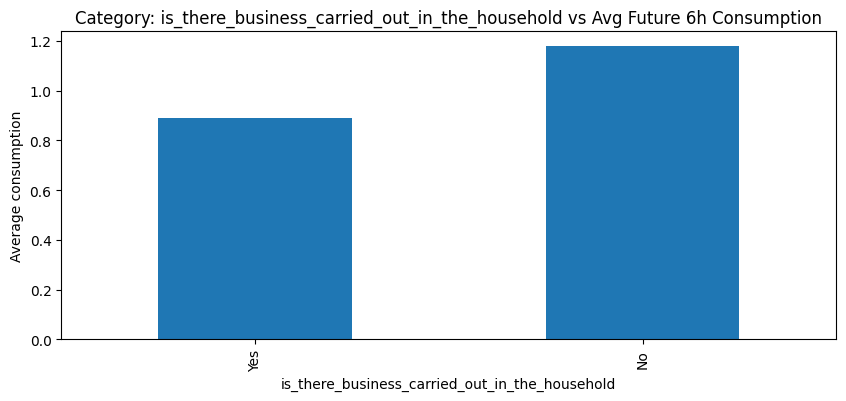

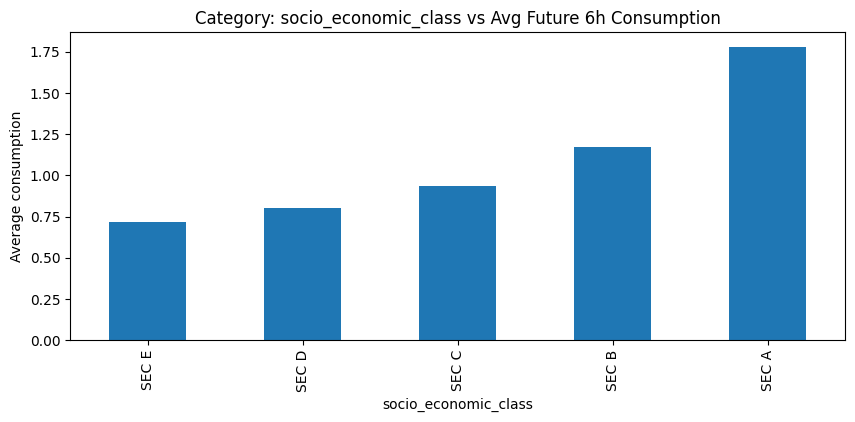

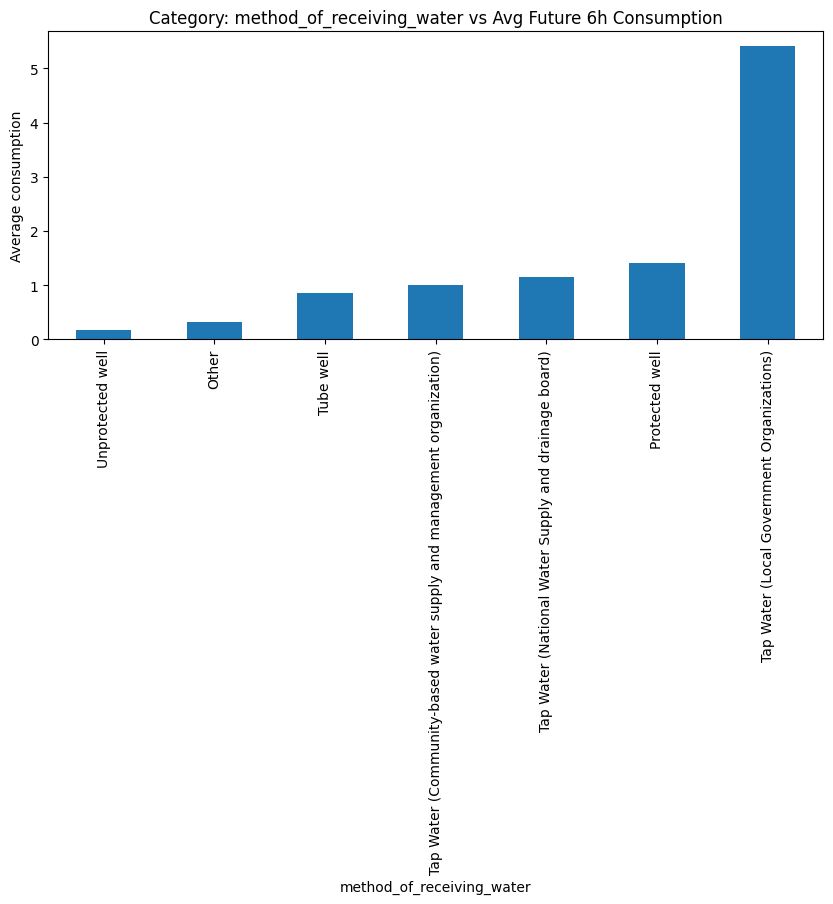

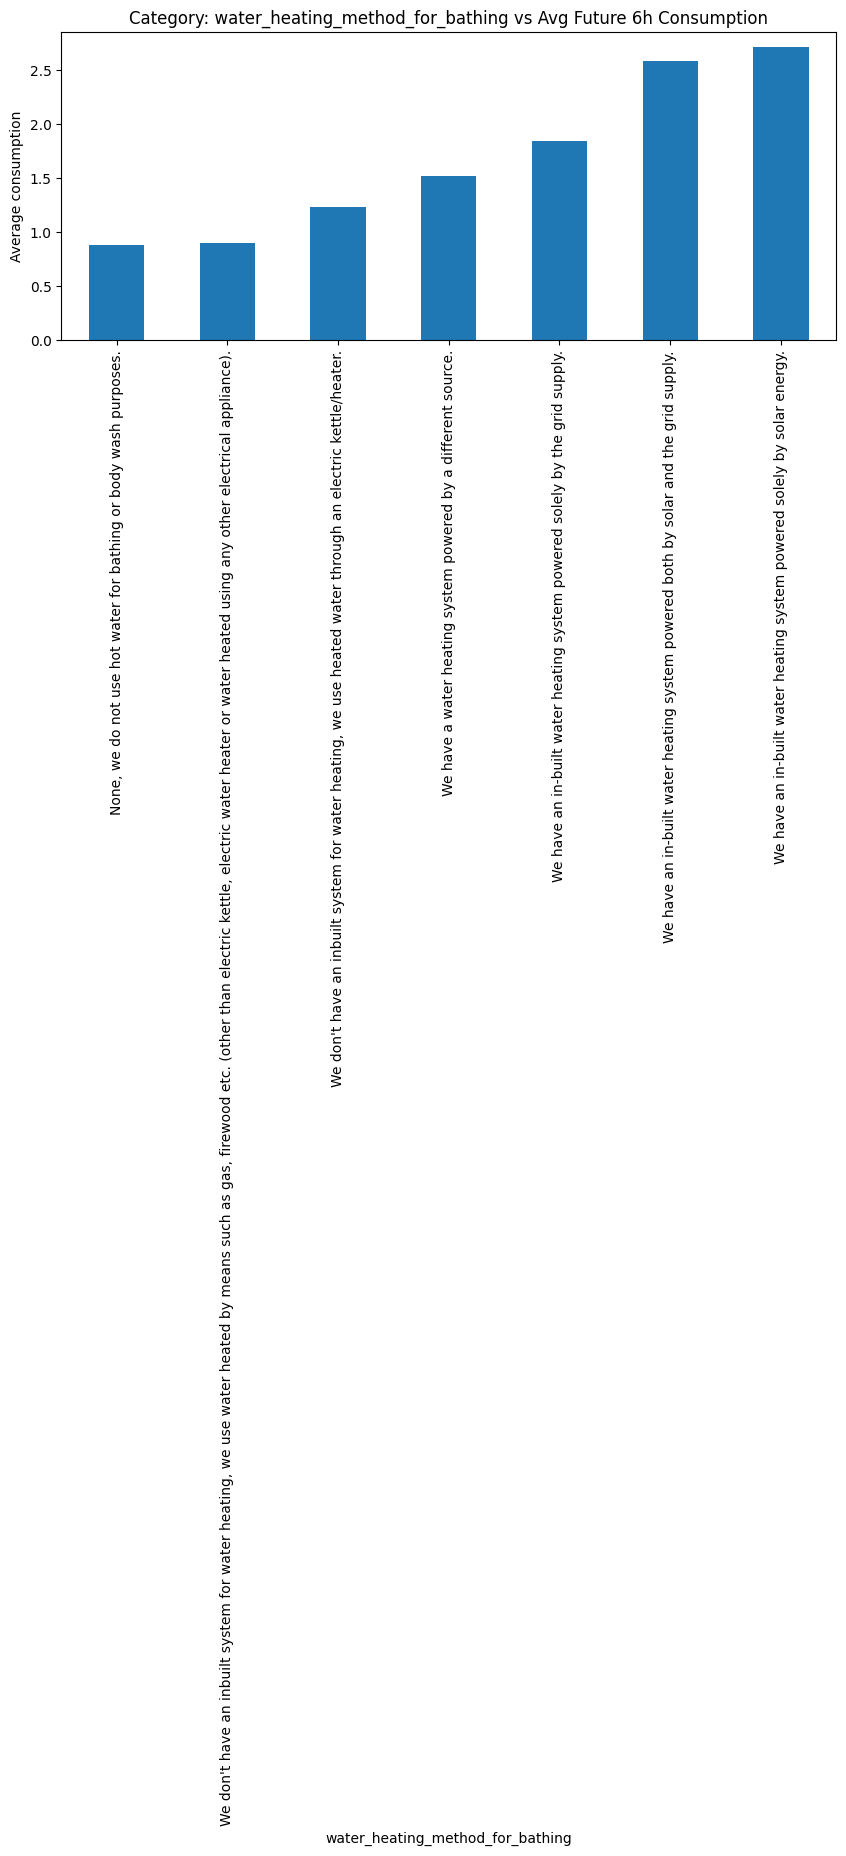

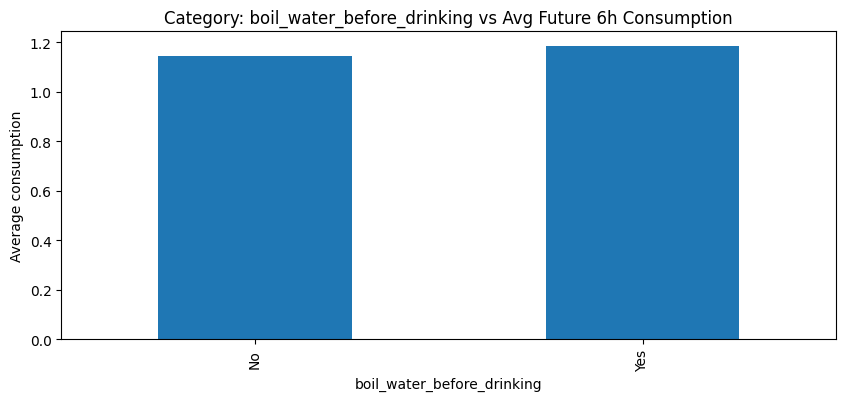

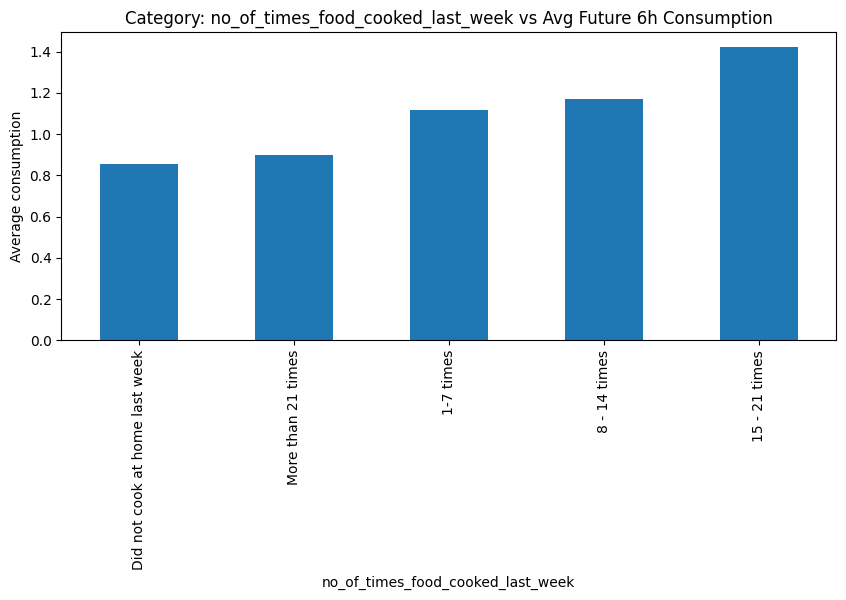

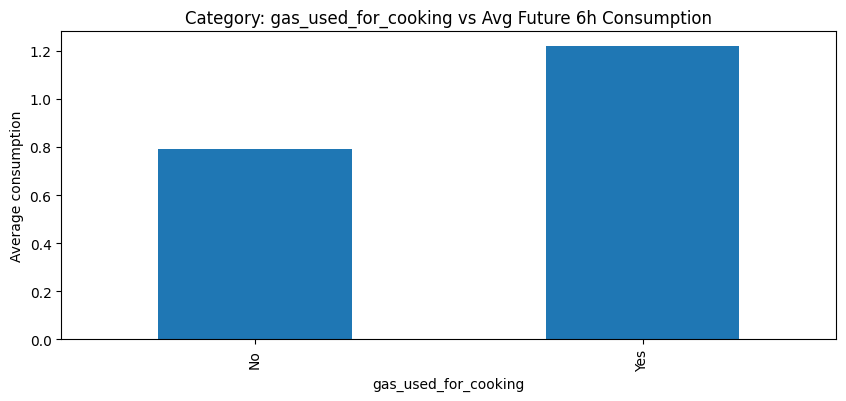

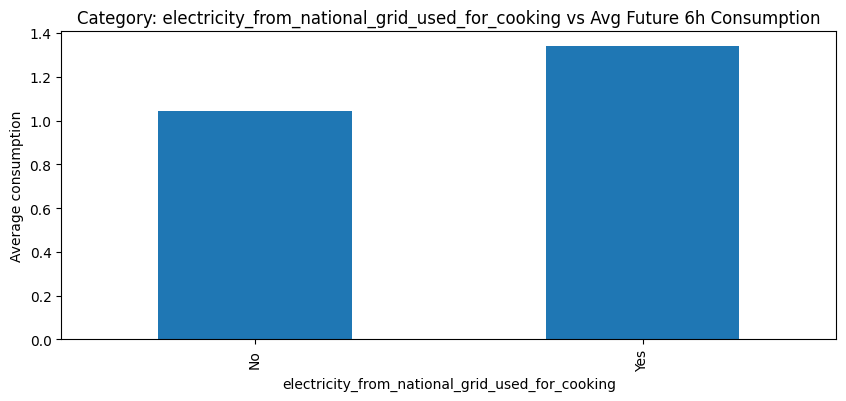

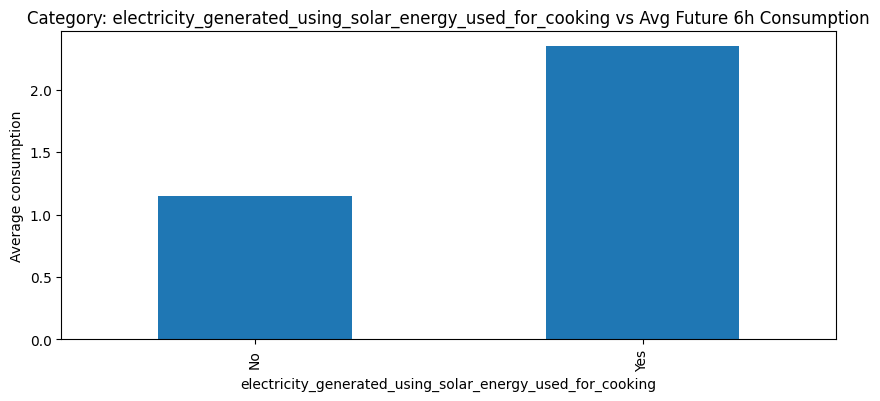

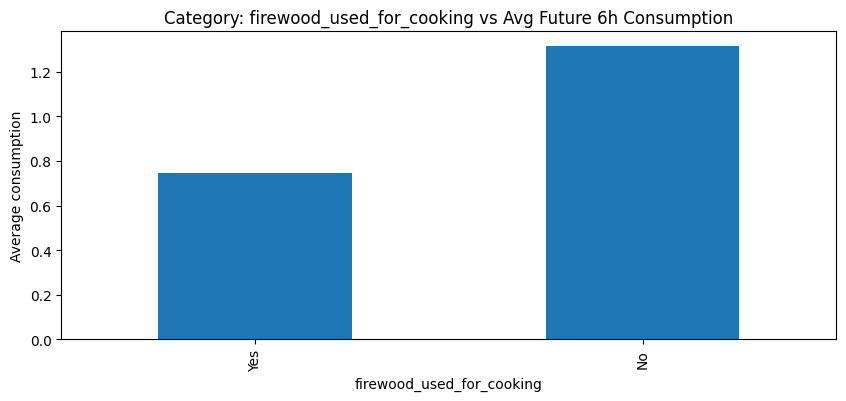

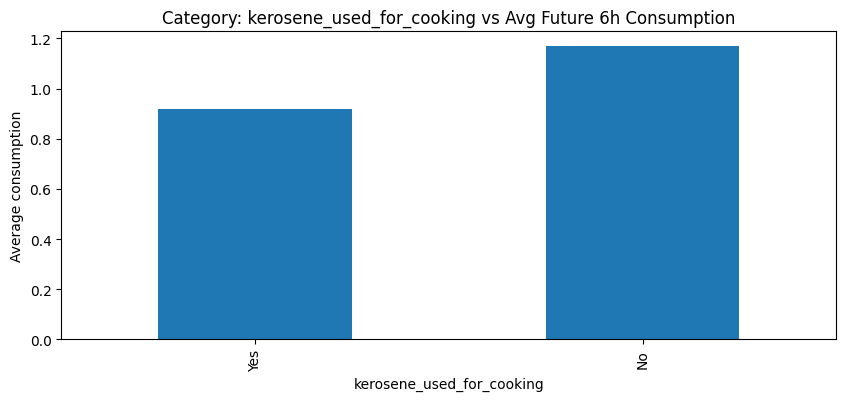

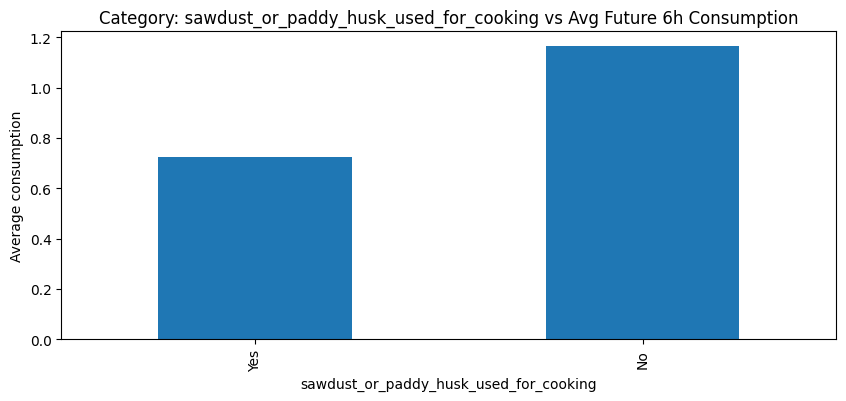

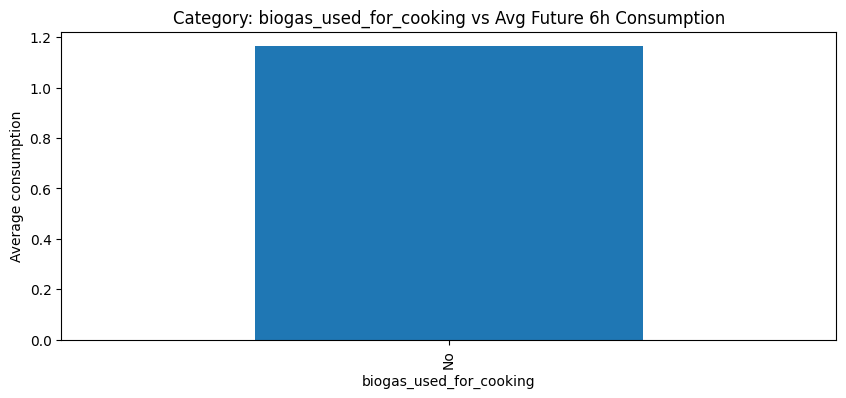

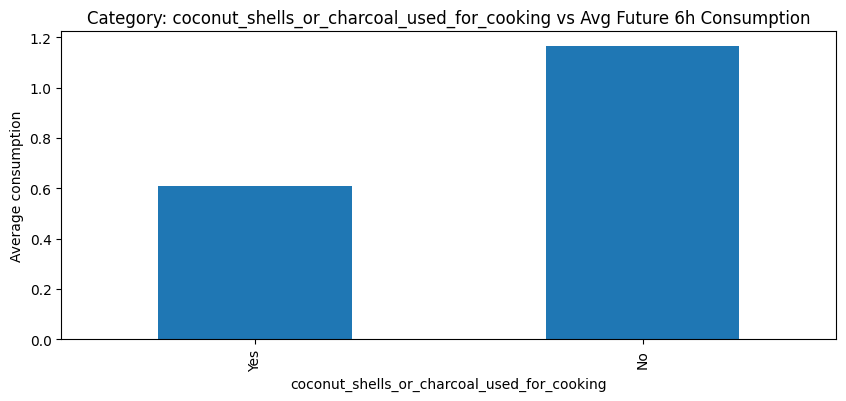

In [36]:
# Categorical Feature Analysis 
cat_cols = df_6h_clean.select_dtypes(exclude=[np.number, "datetime64"]).columns.tolist()

# Avoid meaningless columns like household_ID, DATE, TIME, etc.
ignore_cols = ["household_ID", "DATE", "TIME", "next_timestamp", 'timestamp']
cat_cols = [c for c in cat_cols if c not in ignore_cols]

print("Number of categorical features:", len(cat_cols))
print(cat_cols)

# View different values of categorical features and their average future electricity consumption
for col in cat_cols: 
    plt.figure(figsize=(10,4))
    tmp = df_6h_clean.groupby(col)["future_6h_consumption"].mean().sort_values()
    tmp.plot(kind="bar")
    plt.title(f"Category: {col} vs Avg Future 6h Consumption")
    plt.ylabel("Average consumption")
    plt.show()


In [ ]:
# Encode categorical features using Label Encoding
# from sklearn.preprocessing import LabelEncoder
# for col in cat_cols:
#     le = LabelEncoder()
#     df_6h_clean[col] = le.fit_transform(df_6h_clean[col])
# df_6h_clean.head()

,household_ID,DATE,TIME,TOTAL_IMPORT (kWh),w1_hh_member_count,w1_hh_avg_age,w1_hh_num_children,w1_hh_num_seniors,w1_hh_avg_hours_home,w1_hh_share_went_out_for_work,w1_num_fans,w1_fan_hours_day,w1_fan_hours_night,w1_num_lights,w1_light_total_wattage,w1_light_hours_day,w1_light_hours_night,w1_num_rooms,w1_total_windows,w1_total_doors_ext,w1_total_room_bulbs,w1_total_room_fans,w1_total_room_acs,w1_num_bedrooms,own_the_house_or_living_on_rent,built_year_of_the_house,type_of_house,floor_area,is_there_business_carried_out_in_the_household,socio_economic_class,total_monthly_expenditure_of_last_month,method_of_receiving_water,water_heating_method_for_bathing,boil_water_before_drinking,no_of_times_food_cooked_last_week,gas_used_for_cooking,electricity_from_national_grid_used_for_cooking,electricity_generated_using_solar_energy_used_for_cooking,firewood_used_for_cooking,kerosene_used_for_cooking,sawdust_or_paddy_husk_used_for_cooking,biogas_used_for_cooking,coconut_shells_or_charcoal_used_for_cooking,timestamp,next_timestamp,next_import,delta_hours_next,future_6h_consumption
0,ID0220,2023-01-01,1:11:16,2203.1041,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-01 01:11:16,2023-01-01 06:29:34,2203.709,5.305000,0.6049
1,ID0220,2023-01-02,21:22:00,2209.0300,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-02 21:22:00,2023-01-03 01:42:52,2209.764,4.347778,0.7340
2,ID0220,2023-01-03,1:42:52,2209.7640,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-03 01:42:52,2023-01-03 06:40:57,2210.320,4.968056,0.5560
3,ID0220,2023-01-03,21:17:42,2212.8880,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-03 21:17:42,2023-01-04 01:45:27,2213.847,4.462500,0.9590
4,ID0220,2023-01-04,1:45:27,2213.8470,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-04 01:45:27,2023-01-04 06:40:59,2214.752,4.925556,0.9050


##  ===== 3. New Feature construction =====

In [38]:
# ===== temporal features =====
df_6h_clean["hour"] = pd.to_datetime(df_6h_clean["timestamp"]).dt.hour
df_6h_clean["dayofweek"] = pd.to_datetime(df_6h_clean["timestamp"]).dt.dayofweek
df_6h_clean["month"] = pd.to_datetime(df_6h_clean["timestamp"]).dt.month

# ===== backward average hourly electricity consumption between the latest and previous readings =====
df_6h_clean["prev_import"] = df_6h_clean.groupby("household_ID")["TOTAL_IMPORT (kWh)"].shift(1)
prev_timestamp = df_6h_clean.groupby("household_ID")["timestamp"].shift(1)
delta_time = (
    pd.to_datetime(df_6h_clean["timestamp"]) - pd.to_datetime(prev_timestamp)
).dt.total_seconds() / 3600.0
df_6h_clean["backward_avg_consumption"] = (df_6h_clean["TOTAL_IMPORT (kWh)"] - df_6h_clean["prev_import"]) / delta_time
df_6h_clean.loc[df_6h_clean["backward_avg_consumption"] <= 0, "backward_avg_consumption"] = np.nan

# ===== consumption per household member =====
if "w1_hh_member_count" in df_6h_clean.columns:
    df_6h_clean["consumption_per_member"] = df_6h_clean["backward_avg_consumption"] / df_6h_clean["w1_hh_member_count"]

# ===== fan density (number of fans per unit floor area) =====
if "floor_area" in df_6h_clean.columns and "w1_num_fans" in df_6h_clean.columns:
    df_6h_clean["fan_density"] = df_6h_clean["w1_num_fans"] / df_6h_clean["floor_area"].replace(0, np.nan)

print("Feature engineering completed")


Feature engineering completed


In [39]:

def compute_time_window_avgs(household_ids,
                             date_days,
                             tod_seconds,
                             cons,
                             max_lookback=50,
                             window_seconds=7200):
    n = len(cons)
    avg_5d = np.full(n, np.nan)
    avg_1d = np.full(n, np.nan)
    avg_1w = np.full(n, np.nan)

    for i in range(n):
        # 当前行信息
        hid_i = household_ids[i]
        date_i = date_days[i]
        tod_i = tod_seconds[i]

        sum_5d = 0.0
        cnt_5d = 0

        sum_1d = 0.0
        cnt_1d = 0

        sum_1w = 0.0
        cnt_1w = 0

        # 从当前行往前最多看 50 行
        start = i - max_lookback
        if start < 0:
            start = 0

        for j in range(i - 1, start - 1, -1):
            # 不同 household，提前结束
            if household_ids[j] != hid_i:
                break

            # 如果这个间隔用电量是 NaN，跳过
            c = cons[j]
            if np.isnan(c):
                continue

            diff_days = int(date_i - date_days[j])

            # 只关心过去的读数
            if diff_days <= 0:
                continue

            # 如果已经超过 7 天，就可以退出本循环（更早的都没用）
            if diff_days > 7:
                break

            # 时间窗口：±window_seconds（这里是 ±2 小时）
            dtod = abs(tod_i - tod_seconds[j])
            if dtod > window_seconds:
                continue

            # 过去 5 天（1~5 天）
            if 1 <= diff_days <= 5:
                sum_5d += c
                cnt_5d += 1

            # 头一天（正好 1 天）
            if diff_days == 1:
                sum_1d += c
                cnt_1d += 1

            # 上一周该天（正好 7 天）
            if diff_days == 7:
                sum_1w += c
                cnt_1w += 1

        # 写入平均值
        if cnt_5d > 0:
            avg_5d[i] = sum_5d / cnt_5d
        if cnt_1d > 0:
            avg_1d[i] = sum_1d / cnt_1d
        if cnt_1w > 0:
            avg_1w[i] = sum_1w / cnt_1w

    return avg_5d, avg_1d, avg_1w


In [40]:
# Add Electricity Consumption Patterns in the Same Time Period

# Average power consumption during the same period for the past 5 days.
df_6h_clean = df_6h_clean.sort_values(['household_ID', 'timestamp']).reset_index(drop=True)
df_6h_clean['consumption_kwh'] = df_6h_clean.groupby('household_ID')['TOTAL_IMPORT (kWh)'].diff()

# household_ID to int32
hid_codes, hid_uniques = pd.factorize(df_6h_clean['household_ID'], sort=False)
household_ids = hid_codes.astype(np.int32)

# Date to int32 representing days since epoch
date_days = df_6h_clean['DATE'].values.astype('datetime64[D]').astype(np.int32)

# Time of day to seconds (0~86400) int32
df_6h_clean['TIME'] = pd.to_timedelta(df_6h_clean['TIME'], errors='coerce')
tod_seconds = df_6h_clean['TIME'].dt.total_seconds().astype(np.int32).values

# Interval electricity consumption
cons = df_6h_clean['consumption_kwh'].astype(float).values

avg_5d, avg_1d, avg_1w = compute_time_window_avgs(
    household_ids=household_ids,
    date_days=date_days,
    tod_seconds=tod_seconds,
    cons=cons,
    max_lookback=50,      # Only look back 50 rows
    window_seconds=3*3600 # Same time period defined as ±3 hours
)

df_6h_clean['avg_5d_same_time_kwh'] = avg_5d
df_6h_clean['avg_1d_same_time_kwh'] = avg_1d
df_6h_clean['avg_1w_same_time_kwh'] = avg_1w

In [41]:
# delete temporary column
df_6h_clean.drop(columns=['consumption_kwh', 'prev_import', 'next_timestamp', 'next_import', 'delta_hours_next',
                          'prev_import', 'consumption_kwh'], inplace=True)

In [42]:
df_6h_clean.head()

,household_ID,DATE,TIME,TOTAL_IMPORT (kWh),w1_hh_member_count,w1_hh_avg_age,w1_hh_num_children,w1_hh_num_seniors,w1_hh_avg_hours_home,w1_hh_share_went_out_for_work,w1_num_fans,w1_fan_hours_day,w1_fan_hours_night,w1_num_lights,w1_light_total_wattage,w1_light_hours_day,w1_light_hours_night,w1_num_rooms,w1_total_windows,w1_total_doors_ext,w1_total_room_bulbs,w1_total_room_fans,w1_total_room_acs,w1_num_bedrooms,own_the_house_or_living_on_rent,built_year_of_the_house,type_of_house,floor_area,is_there_business_carried_out_in_the_household,socio_economic_class,total_monthly_expenditure_of_last_month,method_of_receiving_water,water_heating_method_for_bathing,boil_water_before_drinking,no_of_times_food_cooked_last_week,gas_used_for_cooking,electricity_from_national_grid_used_for_cooking,electricity_generated_using_solar_energy_used_for_cooking,firewood_used_for_cooking,kerosene_used_for_cooking,sawdust_or_paddy_husk_used_for_cooking,biogas_used_for_cooking,coconut_shells_or_charcoal_used_for_cooking,timestamp,future_6h_consumption,hour,dayofweek,month,backward_avg_consumption,consumption_per_member,fan_density,avg_5d_same_time_kwh,avg_1d_same_time_kwh,avg_1w_same_time_kwh
0,ID0220,2023-01-01,0 days 01:11:16,2203.1041,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-01 01:11:16,0.6049,1,6,1,NaN,NaN,0.002,NaN,NaN,NaN
1,ID0220,2023-01-02,0 days 21:22:00,2209.0300,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-02 21:22:00,0.7340,21,0,1,0.134134,0.067067,0.002,NaN,NaN,NaN
2,ID0220,2023-01-03,0 days 01:42:52,2209.7640,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-03 01:42:52,0.5560,1,1,1,0.168822,0.084411,0.002,NaN,NaN,NaN
3,ID0220,2023-01-03,0 days 21:17:42,2212.8880,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-03 21:17:42,0.9590,21,1,1,0.159546,0.079773,0.002,5.9259,5.9259,NaN
4,ID0220,2023-01-04,0 days 01:45:27,2213.8470,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-04 01:45:27,0.9050,1,2,1,0.214902,0.107451,0.002,0.7340,0.7340,NaN


In [44]:
new_cols = ["hour", "dayofweek", "month",
            "backward_avg_consumption",
            "consumption_per_member",
            "avg_5d_same_time_kwh",
            "avg_1d_same_time_kwh",
            "avg_1w_same_time_kwh",
            "fan_density"]

tmp_corr = df_6h_clean[new_cols + ["future_6h_consumption"]].corr()["future_6h_consumption"]
tmp_corr.sort_values(ascending=False)


future_6h_consumption       1.000000
hour                        0.168210
backward_avg_consumption    0.129860
consumption_per_member      0.111033
avg_1d_same_time_kwh        0.108292
avg_5d_same_time_kwh        0.086168
avg_1w_same_time_kwh        0.059981
month                       0.006408
dayofweek                  -0.008201
fan_density                -0.061345
Name: future_6h_consumption, dtype: float64

## ===== 4. Save data =====

In [45]:
OUTPUT_FE_PATH =  r"01 Dataset\02 Processed Data\06 Smart_meter_with_features_engineered.csv"
df_6h_clean.to_csv(OUTPUT_FE_PATH, index=False)
print("Saved :", OUTPUT_FE_PATH)


Saved : 01 Dataset\02 Processed Data\06 Smart_meter_with_features_engineered.csv


## ===== 5. Split training dataset and testing dataset =====

In [46]:
RANDOM_STATE = 42

In [48]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets based on household_ID
hh_col = "household_ID"
target_col = "future_6h_consumption"

if hh_col not in df_6h_clean.columns:
    raise KeyError(f"Column '{hh_col}' not found in DataFrame.")


# 1 All unique household_IDs
unique_hh = df_6h_clean[hh_col].dropna().unique()
print("Total households:", len(unique_hh))

# 2 Split train / test by household_ID
train_hh, test_hh = train_test_split(
    unique_hh,
    test_size=0.2,
    random_state=RANDOM_STATE
)

print("Training households:", len(train_hh))
print("Testing households:", len(test_hh))

# 3 Split rows based on household_ID
train_mask = df_6h_clean[hh_col].isin(train_hh)
test_mask  = df_6h_clean[hh_col].isin(test_hh)
X_train = df_6h_clean.loc[train_mask]
X_test  = df_6h_clean.loc[test_mask]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# 4 Verify no household overlap between train and test sets
train_hh_in_rows = set(df_6h_clean.loc[train_mask, hh_col].unique())
test_hh_in_rows  = set(df_6h_clean.loc[test_mask, hh_col].unique())
print("Number of overlapping households (should be 0):", len(train_hh_in_rows & test_hh_in_rows))

# 5 Save train and test sets
X_train.to_csv(r"01 Dataset\03 Data for model\Train_set.csv", index=False)
X_test.to_csv(r"01 Dataset\03 Data for model\Test_set.csv", index=False)
print("Saved train and test sets.")

Total households: 909
Training households: 727
Testing households: 182
X_train shape: (367767, 54)
X_test shape: (94946, 54)
Number of overlapping households (should be 0): 0
Saved train and test sets.
Saved train and test sets.
